In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score, f1_score, jaccard_score, confusion_matrix
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

## Data Loading & Analysis

In [2]:
df = pd.read_excel('DATA_ALMODEL.xlsx')
df.head()

,COUNTRY,FORMATION,FIELD,DAYS,"WHP, Psi",GOR,"GAS CUM PROD, MSCF","OIL CUM PROD, STB","CUM WATER PROD, RB","WATER CUT, %","DAILY GAS PROD, MSCF/D","DAILY OIL PROD, STB/D","DAILY WATER PROD , RB/D","DAILY PROD FLUID, BLP/D","TOTAL PRODUCED FLUID, STB",PROD PATH,WELL ID
0,USA,EAGLE FORD,OSPREY,1,2064.695943,287.475961,145.0,504.39,718.0,58.737392,145.0,504.39,718.0,1222.39,1222.39,Natural_Flow,0
1,USA,EAGLE FORD,OSPREY,2,1989.695943,309.591732,331.0,1069.15,1640.0,62.014044,186.0,564.76,922.0,1486.76,2709.15,Natural_Flow,0
2,USA,EAGLE FORD,OSPREY,3,1864.695943,326.239653,562.0,1722.66,2393.0,53.536768,231.0,653.51,753.0,1406.51,4115.66,Natural_Flow,0
3,USA,EAGLE FORD,OSPREY,4,1814.695943,336.936798,830.0,2463.37,3093.0,48.587155,268.0,740.71,700.0,1440.71,5556.37,Natural_Flow,0
4,USA,EAGLE FORD,OSPREY,5,1714.695943,347.294067,1091.0,3141.43,3623.0,43.871993,261.0,678.06,530.0,1208.06,6764.43,Natural_Flow,0


In [3]:
df.tail()

,COUNTRY,FORMATION,FIELD,DAYS,"WHP, Psi",GOR,"GAS CUM PROD, MSCF","OIL CUM PROD, STB","CUM WATER PROD, RB","WATER CUT, %","DAILY GAS PROD, MSCF/D","DAILY OIL PROD, STB/D","DAILY WATER PROD , RB/D","DAILY PROD FLUID, BLP/D","TOTAL PRODUCED FLUID, STB",PROD PATH,WELL ID
11604,USA,EAGLE FORD,HAWK,1494,220.695943,1095.449026,158863.776584,405926.441541,131050.964418,29.621849,366.975424,335.000000,141.000000,476.000000,425995.134887,Jet_Pump,10
11605,USA,EAGLE FORD,HAWK,1495,164.695943,278.100012,158949.848538,406235.941541,131301.964418,32.790445,86.071954,309.500000,151.000000,460.500000,426455.634887,Jet_Pump,10
11606,USA,EAGLE FORD,HAWK,1496,228.695943,0.000000,158949.848538,406500.941541,131536.967705,48.643411,0.000000,265.000000,251.000000,516.000000,426971.634887,Jet_Pump,10
11607,USA,EAGLE FORD,HAWK,1497,217.695943,370.353857,159050.301839,406772.177548,131785.561873,46.421384,100.453301,271.236007,235.003287,506.239293,427477.874181,Jet_Pump,10
11608,USA,EAGLE FORD,HAWK,1498,237.695943,0.000000,159050.301839,407038.115414,131785.561873,48.314614,0.000000,265.937866,248.594169,514.532035,427992.406216,Jet_Pump,10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11609 entries, 0 to 11608
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   COUNTRY                    11609 non-null  object 
 1   FORMATION                  11609 non-null  object 
 2   FIELD                      11609 non-null  object 
 3   DAYS                       11609 non-null  int64  
 4   WHP, Psi                   11609 non-null  float64
 5   GOR                        11609 non-null  float64
 6   GAS CUM PROD, MSCF         11609 non-null  float64
 7   OIL CUM PROD, STB          11603 non-null  float64
 8    CUM WATER PROD, RB        11609 non-null  float64
 9   WATER CUT, %               11609 non-null  float64
 10  DAILY GAS PROD, MSCF/D     11609 non-null  float64
 11  DAILY OIL PROD, STB/D      11604 non-null  float64
 12  DAILY WATER PROD , RB/D    11606 non-null  float64
 13  DAILY PROD FLUID, BLP/D    11609 non-null  flo

In [5]:
df.columns
cols = [['COUNTRY', 'FORMATION', 'FIELD ', 'DAYS', 'WHP, Psi', 'GOR',
       'GAS CUM PROD, MSCF', 'OIL CUM PROD, STB', ' CUM WATER PROD, RB',
       'WATER CUT, %', 'DAILY GAS PROD, MSCF/D', 'DAILY OIL PROD, STB/D',
       'DAILY WATER PROD , RB/D', 'DAILY PROD FLUID, BLP/D',
       'TOTAL PRODUCED FLUID, STB', 'PROD PATH']]

In [6]:
df.describe()

,DAYS,"WHP, Psi",GOR,"GAS CUM PROD, MSCF","OIL CUM PROD, STB","CUM WATER PROD, RB","WATER CUT, %","DAILY GAS PROD, MSCF/D","DAILY OIL PROD, STB/D","DAILY WATER PROD , RB/D","DAILY PROD FLUID, BLP/D","TOTAL PRODUCED FLUID, STB",WELL ID
count,11609.000000,11609.000000,1.160900e+04,11609.000000,11603.000000,11609.000000,11609.000000,11609.000000,11604.000000,11606.000000,11609.000000,11609.000000,11609.000000
mean,662.646395,251.920851,1.094084e+03,77046.742768,139635.723502,76126.179606,31.680096,111.536136,175.530267,103.248771,278.938018,201059.170877,4.371781
std,506.703301,325.647119,3.217380e+04,45197.410863,87065.153581,36514.574423,19.147001,106.138698,161.800744,156.677682,278.999610,106060.034343,3.506337
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,274.000000,96.000000,3.515485e+02,40357.716000,72693.530000,46211.349000,16.958314,33.480000,63.410000,28.000000,105.000000,117700.304800,1.000000
50%,567.000000,140.000000,5.841659e+02,75301.832702,126477.810000,83397.349000,32.738692,83.150200,120.440000,53.480000,183.120000,187462.090000,4.000000
75%,905.000000,273.211943,9.248909e+02,104094.911788,180000.185100,100118.190000,42.527583,159.590000,243.270000,117.000000,356.420000,286027.650000,7.000000
max,2355.000000,2711.000000,3.447000e+06,224817.910250,407038.115414,146744.100000,100.000000,770.000000,1249.000000,1892.000000,2641.000000,457182.519200,10.000000


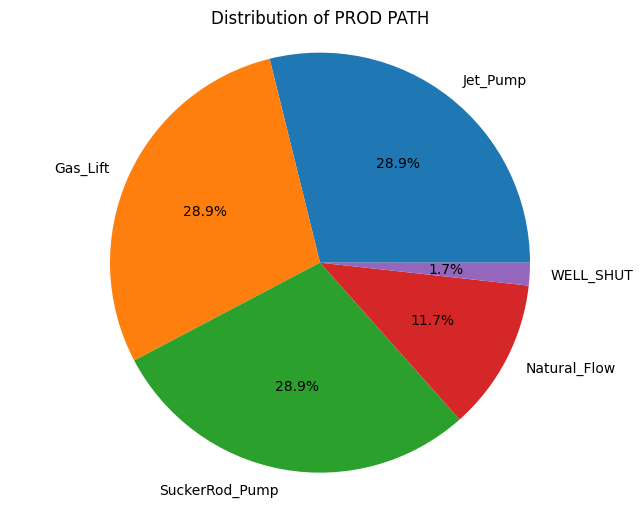

In [7]:
prod_path_counts = df['PROD PATH'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(prod_path_counts, labels=prod_path_counts.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Distribution of PROD PATH')
plt.show()


In [8]:
df = df[~df['PROD PATH'].str.contains('WELL_SHUT|Natural_Flow')]

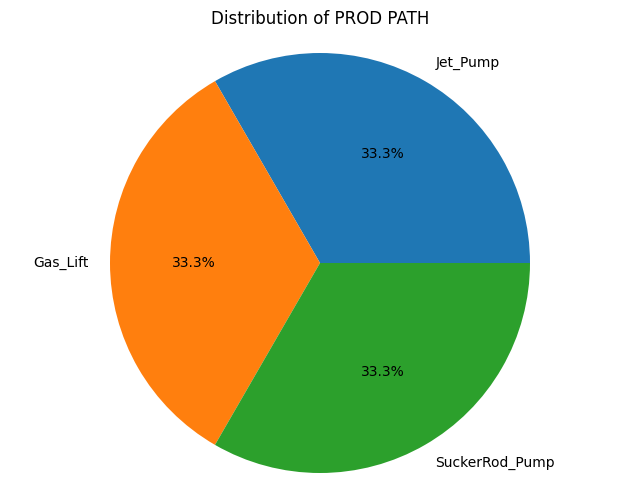

In [9]:
prod_path_counts = df['PROD PATH'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(prod_path_counts, labels=prod_path_counts.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Distribution of PROD PATH')
plt.show()


In [10]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['COUNTRY', 'FORMATION', 'FIELD ', 'PROD PATH']
le = LabelEncoder()

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


In [11]:
df.head()

,COUNTRY,FORMATION,FIELD,DAYS,"WHP, Psi",GOR,"GAS CUM PROD, MSCF","OIL CUM PROD, STB","CUM WATER PROD, RB","WATER CUT, %","DAILY GAS PROD, MSCF/D","DAILY OIL PROD, STB/D","DAILY WATER PROD , RB/D","DAILY PROD FLUID, BLP/D","TOTAL PRODUCED FLUID, STB",PROD PATH,WELL ID
63,0,0,8,64,94.695943,332.555915,9422.333333,28333.08,13345.0,47.998918,27.333333,76.92,71.0,147.92,41678.08,1,0
64,0,0,8,65,84.695943,332.617623,9449.666667,28410.00,13416.0,47.998918,27.333333,76.92,71.0,147.92,41826.00,1,0
65,0,0,8,66,84.695943,332.678998,9477.000000,28486.92,13487.0,47.998918,27.333333,76.92,71.0,147.92,41973.92,1,0
66,0,0,8,67,84.695943,333.085236,9653.000000,28980.57,13592.0,17.539464,176.000000,493.65,105.0,598.65,42572.57,1,0
67,0,0,8,68,89.695943,332.238906,9770.000000,29406.55,13675.0,16.307124,117.000000,425.98,83.0,508.98,43081.55,1,0


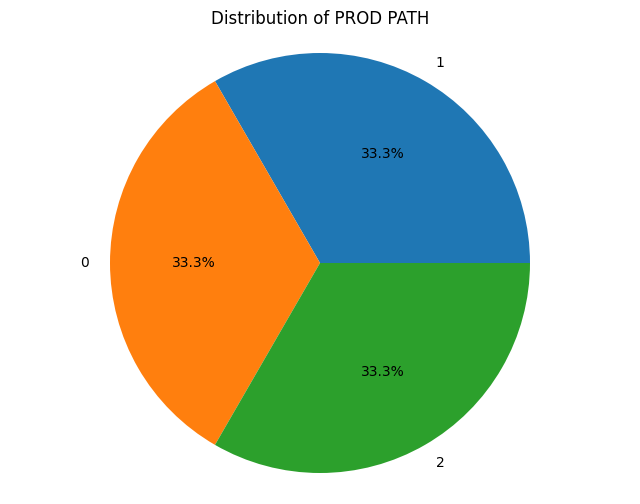

In [12]:
prod_path_counts = df['PROD PATH'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(prod_path_counts, labels=prod_path_counts.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Distribution of PROD PATH')
plt.show()


<Axes: xlabel='FIELD '>

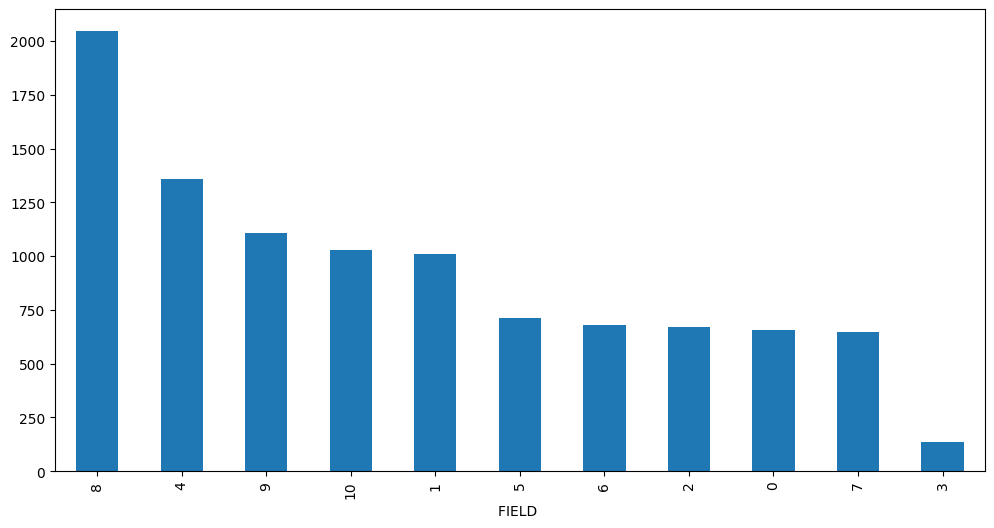

In [13]:
df['FIELD '].value_counts().plot(kind='bar', figsize=(12,6))

In [14]:
import numpy as np

df = df.replace(np.nan, 0)

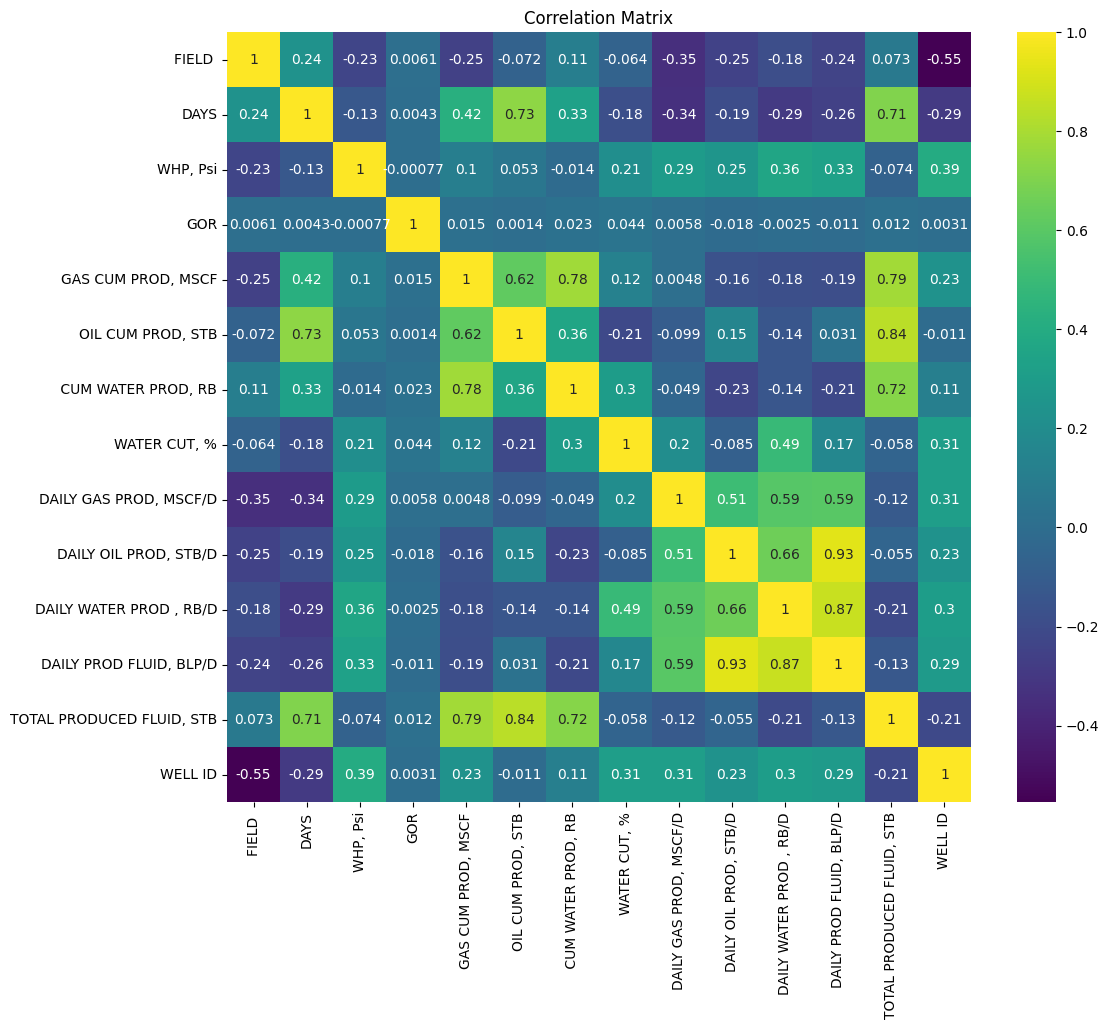

In [15]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.drop(['COUNTRY', 'FORMATION', 'PROD PATH'], axis=1).corr(), annot=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

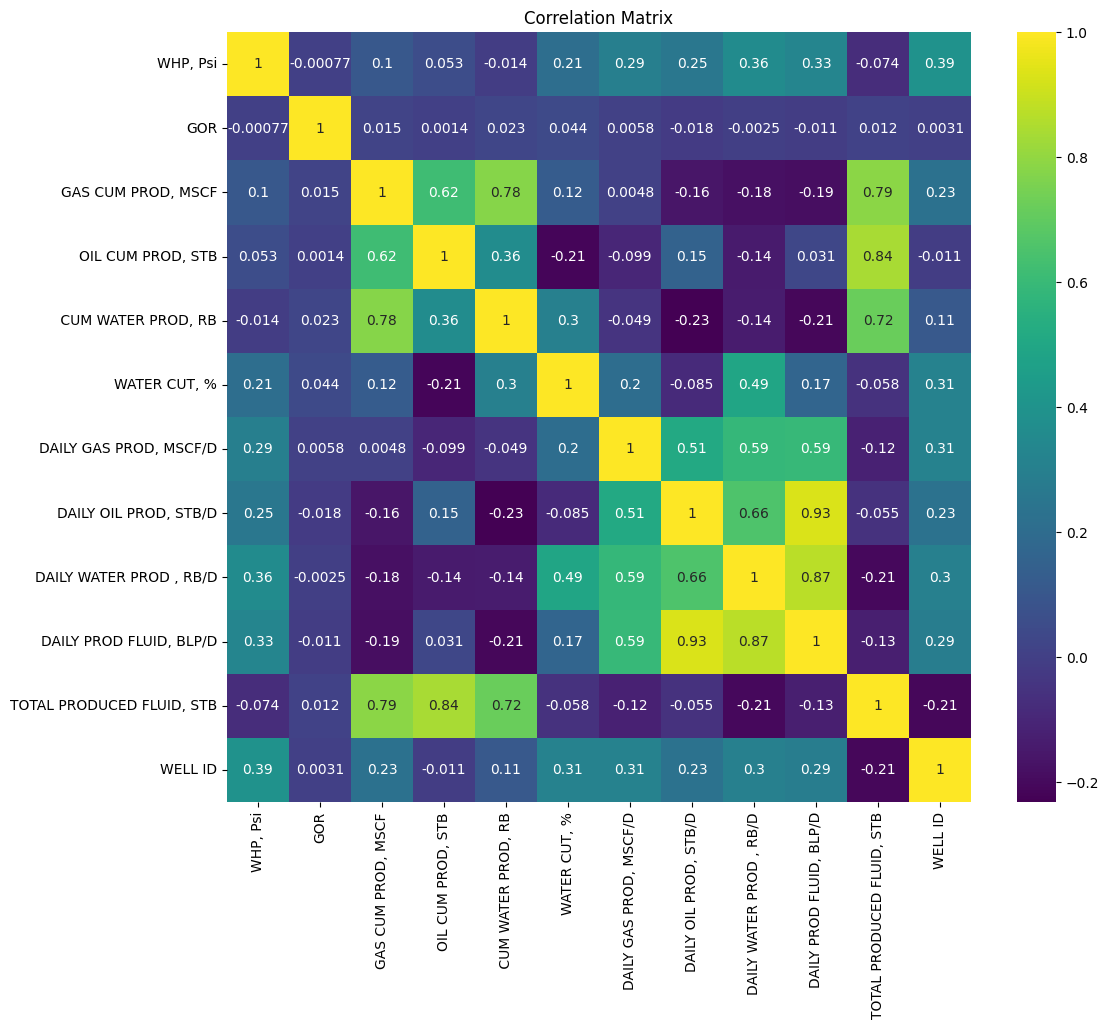

In [16]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.drop(['COUNTRY', 'FORMATION', 'DAYS', 'FIELD ', 'PROD PATH'], axis=1).corr(), annot=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

In [17]:
corr_matrix = df.corr()
print(corr_matrix['PROD PATH'])

COUNTRY                           NaN
FORMATION                         NaN
FIELD                        0.234401
DAYS                         0.335494
WHP, Psi                    -0.080740
GOR                          0.011348
GAS CUM PROD, MSCF           0.141979
OIL CUM PROD, STB            0.077734
 CUM WATER PROD, RB          0.222575
WATER CUT, %                 0.040322
DAILY GAS PROD, MSCF/D      -0.188660
DAILY OIL PROD, STB/D       -0.270380
DAILY WATER PROD , RB/D     -0.145121
DAILY PROD FLUID, BLP/D     -0.238833
TOTAL PRODUCED FLUID, STB    0.149850
PROD PATH                    1.000000
WELL ID                      0.110314
Name: PROD PATH, dtype: float64


In [18]:
df.drop(columns='FIELD ')

,COUNTRY,FORMATION,DAYS,"WHP, Psi",GOR,"GAS CUM PROD, MSCF","OIL CUM PROD, STB","CUM WATER PROD, RB","WATER CUT, %","DAILY GAS PROD, MSCF/D","DAILY OIL PROD, STB/D","DAILY WATER PROD , RB/D","DAILY PROD FLUID, BLP/D","TOTAL PRODUCED FLUID, STB",PROD PATH,WELL ID
63,0,0,64,94.695943,332.555915,9422.333333,28333.080000,13345.000000,47.998918,27.333333,76.920000,71.000000,147.920000,41678.080000,1,0
64,0,0,65,84.695943,332.617623,9449.666667,28410.000000,13416.000000,47.998918,27.333333,76.920000,71.000000,147.920000,41826.000000,1,0
65,0,0,66,84.695943,332.678998,9477.000000,28486.920000,13487.000000,47.998918,27.333333,76.920000,71.000000,147.920000,41973.920000,1,0
66,0,0,67,84.695943,333.085236,9653.000000,28980.570000,13592.000000,17.539464,176.000000,493.650000,105.000000,598.650000,42572.570000,1,0
67,0,0,68,89.695943,332.238906,9770.000000,29406.550000,13675.000000,16.307124,117.000000,425.980000,83.000000,508.980000,43081.550000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11604,0,0,1494,220.695943,1095.449026,158863.776584,405926.441541,131050.964418,29.621849,366.975424,335.000000,141.000000,476.000000,425995.134887,1,10
11605,0,0,1495,164.695943,278.100012,158949.848538,406235.941541,131301.964418,32.790445,86.071954,309.500000,151.000000,460.500000,426455.634887,1,10
11606,0,0,1496,228.695943,0.000000,158949.848538,406500.941541,131536.967705,48.643411,0.000000,265.000000,251.000000,516.000000,426971.634887,1,10
11607,0,0,1497,217.695943,370.353857,159050.301839,406772.177548,131785.561873,46.421384,100.453301,271.236007,235.003287,506.239293,427477.874181,1,10


In [19]:
import numpy as np

def fix_outliers(df, col, method='mean'):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    
    df.loc[df[col] < lower_bound, col] = df[col].mean()
    df.loc[df[col] > upper_bound, col] = df[col].mean()
        
    return df

for col in df.columns:
    df = fix_outliers(df, col, method='mean')


C:\Users\PMLS\AppData\Local\Temp\ipykernel_5836\2159074905.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '5.667860696517413' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.loc[df[col] < lower_bound, col] = df[col].mean()
C:\Users\PMLS\AppData\Local\Temp\ipykernel_5836\2159074905.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '721.308855721393' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col] < lower_bound, col] = df[col].mean()
C:\Users\PMLS\AppData\Local\Temp\ipykernel_5836\2159074905.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '4.516318407960199' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col] < lowe

In [20]:
X = df.drop('PROD PATH', axis=1)
y = df['PROD PATH']

In [21]:
# Make sure 'WELL ID' is retained separately for filtering during prediction
well_id_col = X['WELL ID']
X = X.drop('WELL ID', axis=1)

In [22]:
X

,COUNTRY,FORMATION,FIELD,DAYS,"WHP, Psi",GOR,"GAS CUM PROD, MSCF","OIL CUM PROD, STB","CUM WATER PROD, RB","WATER CUT, %","DAILY GAS PROD, MSCF/D","DAILY OIL PROD, STB/D","DAILY WATER PROD , RB/D","DAILY PROD FLUID, BLP/D","TOTAL PRODUCED FLUID, STB"
63,0,0,8.0,64.0,94.695943,332.555915,9422.333333,28333.080000,13345.000000,47.998918,27.333333,76.920000,71.000000,147.920000,41678.080000
64,0,0,8.0,65.0,84.695943,332.617623,9449.666667,28410.000000,13416.000000,47.998918,27.333333,76.920000,71.000000,147.920000,41826.000000
65,0,0,8.0,66.0,84.695943,332.678998,9477.000000,28486.920000,13487.000000,47.998918,27.333333,76.920000,71.000000,147.920000,41973.920000
66,0,0,8.0,67.0,84.695943,333.085236,9653.000000,28980.570000,13592.000000,17.539464,176.000000,146.474658,105.000000,222.428655,42572.570000
67,0,0,8.0,68.0,89.695943,332.238906,9770.000000,29406.550000,13675.000000,16.307124,117.000000,146.474658,83.000000,508.980000,43081.550000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11604,0,0,4.0,1494.0,220.695943,1095.449026,158863.776584,150389.013777,131050.964418,29.621849,101.589294,335.000000,141.000000,476.000000,425995.134887
11605,0,0,4.0,1495.0,164.695943,278.100012,158949.848538,150389.013777,131301.964418,32.790445,86.071954,309.500000,151.000000,460.500000,426455.634887
11606,0,0,4.0,1496.0,228.695943,0.000000,158949.848538,150389.013777,131536.967705,48.643411,0.000000,265.000000,75.791245,516.000000,426971.634887
11607,0,0,4.0,1497.0,217.695943,370.353857,159050.301839,150389.013777,131785.561873,46.421384,100.453301,271.236007,75.791245,506.239293,427477.874181


In [23]:
np.unique(y)

array([0, 1, 2])

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [25]:
X_scaled.mean(axis=0)

array([ 0.00000000e+00,  0.00000000e+00,  9.04969853e-17, -4.52484926e-17,
        2.48866709e-16, -1.24433355e-16,  0.00000000e+00,  1.35745478e-16,
        3.67644003e-16,  0.00000000e+00, -5.65606158e-18, -4.52484926e-17,
        4.52484926e-17,  1.47057601e-16, -2.99771264e-16])

In [26]:
X_scaled.std(axis=0)

array([0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [27]:
X_train, X_test, y_train, y_test, well_id_train, well_id_test = train_test_split(X_scaled, y, well_id_col, test_size=0.25, random_state=42)

Logistic Regression:
Train Accuracy Score: 0.7177922250232188
Test Accuracy Score: 0.7174691603660963
Train Accuracy Score: 0.7177922250232188
R2 Score: -0.16068420988895207
F1 Score: 0.711532634527828
Jaccard Index: 0.5629109071272372
Probabilities: [[0.02144343 0.97030107 0.0082555 ]
 [0.85396019 0.07904822 0.0669916 ]
 [0.06192065 0.88836478 0.04971457]
 ...
 [0.29908701 0.00687613 0.69403685]
 [0.29139018 0.57776675 0.13084307]
 [0.21984213 0.01647395 0.76368392]]


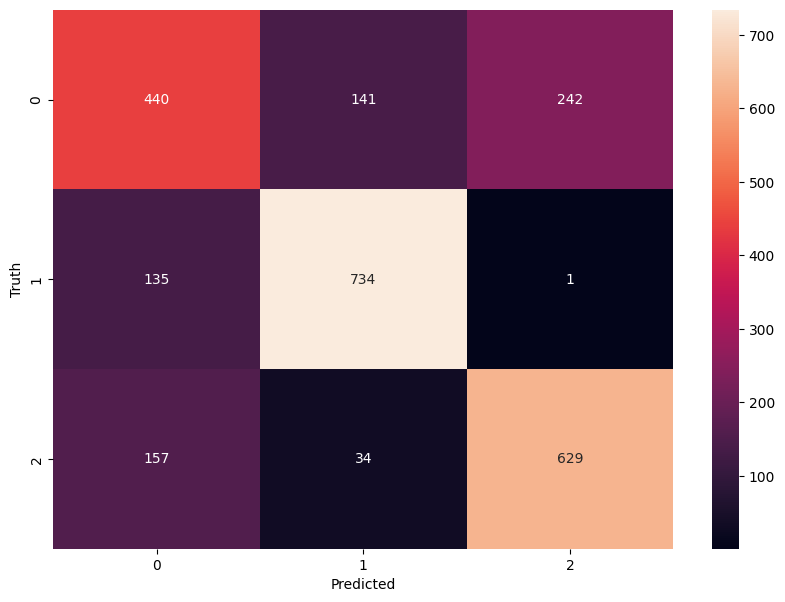


Support Vector Machine:
Train Accuracy Score: 0.9754544248374685
Test Accuracy Score: 0.9681655391961799
Train Accuracy Score: 0.9754544248374685
R2 Score: 0.8344488174673336
F1 Score: 0.9677472178948823
Jaccard Index: 0.9380222694257542
Probabilities: [[7.22877801e-03 9.92539854e-01 2.31367875e-04]
 [9.99546238e-01 4.53662401e-04 9.91991530e-08]
 [2.52411830e-06 9.99842078e-01 1.55397513e-04]
 ...
 [9.24845326e-01 3.07948391e-04 7.48467258e-02]
 [1.73605419e-03 9.97941138e-01 3.22807503e-04]
 [3.83557865e-03 3.28326215e-06 9.96161138e-01]]


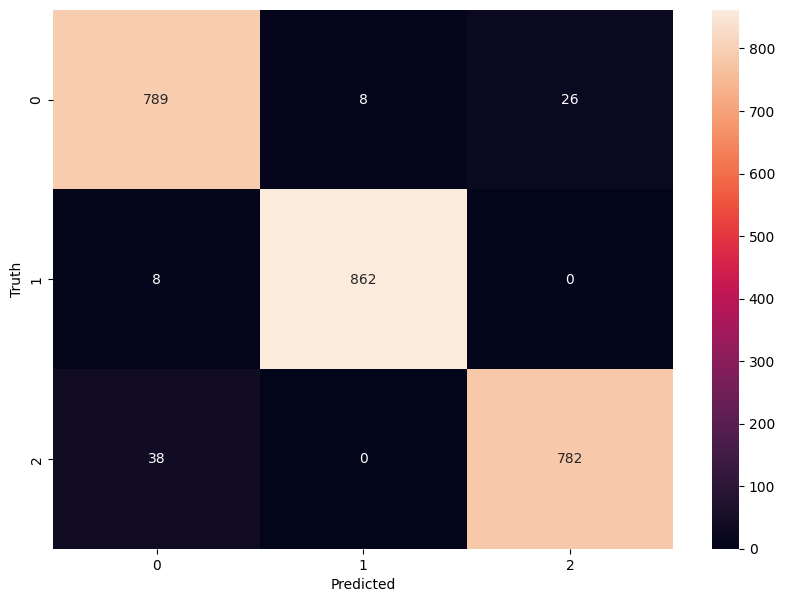


Random Forest:
Train Accuracy Score: 1.0
Test Accuracy Score: 0.9984082769598089
Train Accuracy Score: 1.0
R2 Score: 0.992087627305424
F1 Score: 0.9983891293416752
Jaccard Index: 0.9967846264369228
Probabilities: [[0.09 0.91 0.  ]
 [1.   0.   0.  ]
 [0.05 0.94 0.01]
 ...
 [0.94 0.   0.06]
 [0.   1.   0.  ]
 [0.02 0.   0.98]]


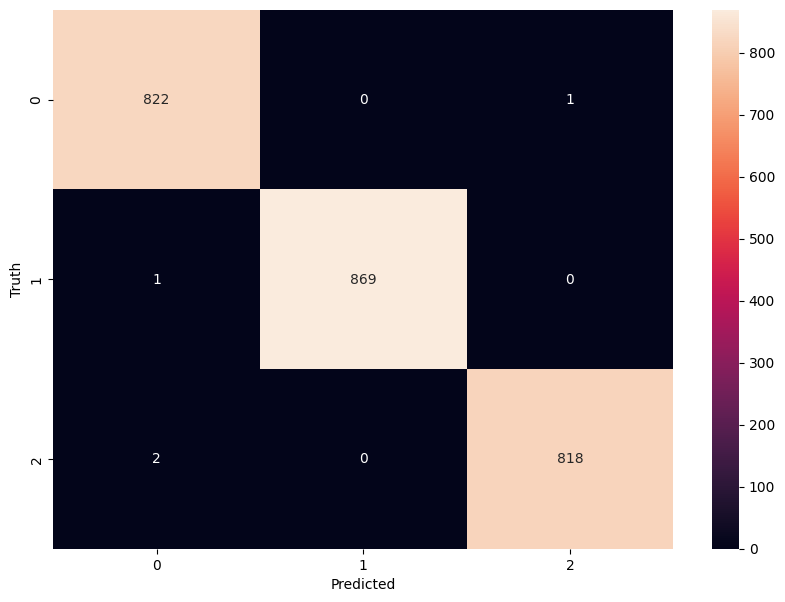


Decision Tree:
Train Accuracy Score: 1.0
Test Accuracy Score: 0.9976124154397135
Train Accuracy Score: 1.0
R2 Score: 0.9872184748779926
F1 Score: 0.997576353272189
Jaccard Index: 0.9951679443193924
Probabilities: [[0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 ...
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


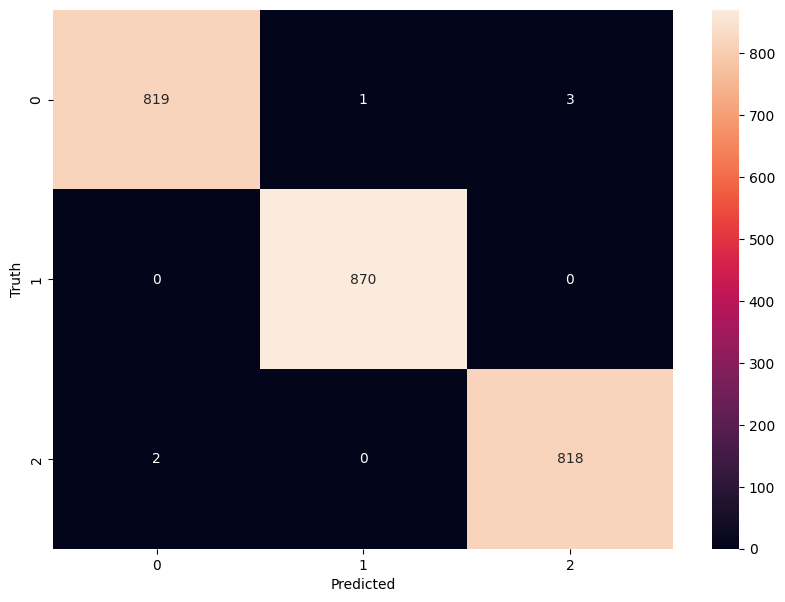


K-Nearest Neighbors:
Train Accuracy Score: 0.9802308610853124
Test Accuracy Score: 0.9673696776760844
Train Accuracy Score: 0.9802308610853124
R2 Score: 0.8277537328796154
F1 Score: 0.9669596849680154
Jaccard Index: 0.936597117275224
Probabilities: [[0.  1.  0. ]
 [1.  0.  0. ]
 [0.  1.  0. ]
 ...
 [0.8 0.  0.2]
 [0.  1.  0. ]
 [0.  0.  1. ]]


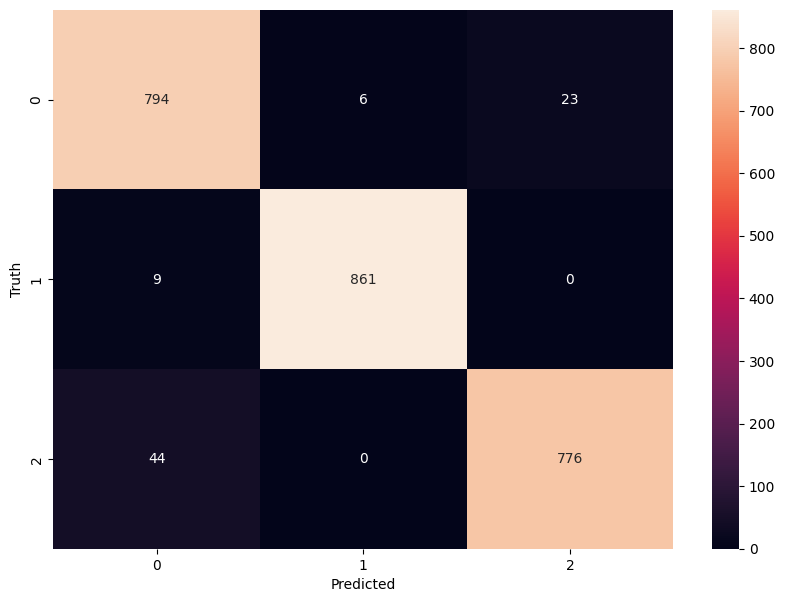

In [28]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

pipe_lr = make_pipeline(StandardScaler(), LogisticRegression())
pipe_lr.fit(X_train, y_train)
print("Logistic Regression:")
print("Train Accuracy Score:", accuracy_score(y_train, pipe_lr.predict(X_train)))
print("Test Accuracy Score:", accuracy_score(y_test, pipe_lr.predict(X_test)))
print("Train Accuracy Score:", accuracy_score(y_train, pipe_lr.predict(X_train)))
print("R2 Score:", r2_score(y_test, pipe_lr.predict(X_test), multioutput='variance_weighted'))
print("F1 Score:", f1_score(y_test, pipe_lr.predict(X_test), average='macro'))
print("Jaccard Index:", jaccard_score(y_test, pipe_lr.predict(X_test), average='macro'))
print("Probabilities:", pipe_lr.predict_proba(X_test))
with open('pipe_lr.pkl', 'wb') as f:
    pickle.dump(pipe_lr, f)
cm = confusion_matrix(y_test, pipe_lr.predict(X_test))
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

pipe_svc = make_pipeline(StandardScaler(), SVC(probability=True))
pipe_svc.fit(X_train, y_train)
print("\nSupport Vector Machine:")
print("Train Accuracy Score:", accuracy_score(y_train, pipe_svc.predict(X_train)))
print("Test Accuracy Score:", accuracy_score(y_test, pipe_svc.predict(X_test)))
print("Train Accuracy Score:", accuracy_score(y_train, pipe_svc.predict(X_train)))
print("R2 Score:", r2_score(y_test, pipe_svc.predict(X_test), multioutput='variance_weighted'))
print("F1 Score:", f1_score(y_test, pipe_svc.predict(X_test), average='macro'))
print("Jaccard Index:", jaccard_score(y_test, pipe_svc.predict(X_test), average='macro'))
print("Probabilities:", pipe_svc.predict_proba(X_test))
with open('pipe_svc.pkl', 'wb') as f:
    pickle.dump(pipe_svc, f)
cm = confusion_matrix(y_test, pipe_svc.predict(X_test))
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

pipe_rf = make_pipeline(StandardScaler(), RandomForestClassifier())
pipe_rf.fit(X_train, y_train)
print("\nRandom Forest:")
print("Train Accuracy Score:", accuracy_score(y_train, pipe_rf.predict(X_train)))
print("Test Accuracy Score:", accuracy_score(y_test, pipe_rf.predict(X_test)))
print("Train Accuracy Score:", accuracy_score(y_train, pipe_rf.predict(X_train)))
print("R2 Score:", r2_score(y_test, pipe_rf.predict(X_test), multioutput='variance_weighted'))
print("F1 Score:", f1_score(y_test, pipe_rf.predict(X_test), average='macro'))
print("Jaccard Index:", jaccard_score(y_test, pipe_rf.predict(X_test), average='macro'))
print("Probabilities:", pipe_rf.predict_proba(X_test))
with open('pipe_rf.pkl', 'wb') as f:
    pickle.dump(pipe_rf, f)
cm = confusion_matrix(y_test, pipe_rf.predict(X_test))
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

pipe_dt = make_pipeline(StandardScaler(), DecisionTreeClassifier())
pipe_dt.fit(X_train, y_train)
print("\nDecision Tree:")
print("Train Accuracy Score:", accuracy_score(y_train, pipe_dt.predict(X_train)))
print("Test Accuracy Score:", accuracy_score(y_test, pipe_dt.predict(X_test)))
print("Train Accuracy Score:", accuracy_score(y_train, pipe_dt.predict(X_train)))
print("R2 Score:", r2_score(y_test, pipe_dt.predict(X_test), multioutput='variance_weighted'))
print("F1 Score:", f1_score(y_test, pipe_dt.predict(X_test), average='macro'))
print("Jaccard Index:", jaccard_score(y_test, pipe_dt.predict(X_test), average='macro'))
print("Probabilities:", pipe_dt.predict_proba(X_test))
with open('pipe_dt.pkl', 'wb') as f:
    pickle.dump(pipe_dt, f)
cm = confusion_matrix(y_test, pipe_dt.predict(X_test))
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

pipe_knn = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5))
pipe_knn.fit(X_train, y_train)
print("\nK-Nearest Neighbors:")
print("Train Accuracy Score:", accuracy_score(y_train, pipe_knn.predict(X_train)))
print("Test Accuracy Score:", accuracy_score(y_test, pipe_knn.predict(X_test)))
print("Train Accuracy Score:", accuracy_score(y_train, pipe_knn.predict(X_train)))
print("R2 Score:", r2_score(y_test, pipe_knn.predict(X_test), multioutput='variance_weighted'))
print("F1 Score:", f1_score(y_test, pipe_knn.predict(X_test), average='macro'))
print("Jaccard Index:", jaccard_score(y_test, pipe_knn.predict(X_test), average='macro'))
print("Probabilities:", pipe_knn.predict_proba(X_test))
with open('pipe_knn.pkl', 'wb') as f:
    pickle.dump(pipe_knn, f)
cm = confusion_matrix(y_test, pipe_knn.predict(X_test))
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()


In [29]:
def predict_for_well(well_id, input_data, full_model, well_ids):
    # Filter the input data to only include the rows for the given well_id
    filtered_data = input_data[well_ids == well_id]
    
    # Make predictions using the filtered data
    predictions = full_model.predict(filtered_data)
    prediction_probabilities = full_model.predict_proba(filtered_data)
    
    return predictions, prediction_probabilities

In [30]:
# Example: Make prediction for well_id = 0
input_data = X_test  # Testing data
well_id_to_predict = 0

# Predict for well_id = 0
predictions, pred_probs = predict_for_well(well_id_to_predict, input_data, pipe_svc, well_id_test)

# Output predictions and probabilities
print(f"Predictions for Well ID {well_id_to_predict}:", predictions)
print(f"Prediction Probabilities for Well ID {well_id_to_predict}:", pred_probs)

Predictions for Well ID 0: [1 1 0 2 2 1 1 1 2 2 1 1 1 1 1 2 1 0 1 2 2 1 1 0 1 2 1 2 2 2 1 2 1 1 1 1 0
 1 2 1 2 1 1 2 1 0 1 1 1 2 2 1 0 1 2 0 1 0 1 2 1 0 2 0 1 1 2 1 1 2 1 2 1 1
 1 1 0 2 2 2 1 1 1 2 2 2 1 1 2 2 0 2 1 1 2 1 1 0 2 2 1 2 1 2 2 2 1 2 1 1 2
 2 0 0 2 1 0 2 1 1 2 1 2 1 1 1 0 0 1 1 2 2 1 2 1 2 2 1 1 2 2 2 1 0 1 0 0 2
 2 1 1 1 0 1 1 1 2 2 2 1 0 1 1 2 2 1 2 2 1 0 1 1 1 2 2 1 0 1 1 2 1 2 2 1 0
 1 0 1 1 2 2 1 0 2 1 1 0 0 2 0 1 2 2 2 2 1 1 1 1 1 2 2 1 2 1 1 1 1 0 1 1 1
 0 1 2 1 1 2 1 1 1 1 2 2 1 1 1 2 0 1 1 2 1 1 1 2 1 1 2 2 2 1 2 2 2 1 1 1 2
 2 1 1 0 2 2 1 0 2 1 1 1 1 1 0 2 0 2 1 0 1 1 2 2 1 1 2 1 0 1 1 2 1 2 1 0 1
 2 1 0 1 1 1 2 1 2 1 0 0 2 1 2 2 2 2 2 2 1 1 1 2 0 2 1 1 1 2 1 1 1 2 0 0 0
 2 1 1 0 0 2 1 2 1 1 0 1 1 2 0 1 1 2 2 1 2 0 1 2 1 1 2 1 1 1 1 1 1 1 2 0 1
 0 2 2 1 2 0 1 1 1 2 1 1 2 1 1 2 1 2 1 1 1 1 1 1 2 2 2 2 2 2 1 1 0 2 0 1 1
 2 2 1 1 1 0 0 2 2 1 0 2 1 1 2 2 1 2 2 1 2 2 2 1 0 2 1 2 0 0 2 1 1 2 2 2 1
 1 1 2 2 2 1 1 2 1 0 1 1 2 2 1 2 0 1 2 1 2 1 1 1 0 2 1 2 2 1 2 2 1 2 0 2 

In [31]:
df.columns

Index(['COUNTRY', 'FORMATION', 'FIELD ', 'DAYS', 'WHP, Psi', 'GOR',
       'GAS CUM PROD, MSCF', 'OIL CUM PROD, STB', ' CUM WATER PROD, RB',
       'WATER CUT, %', 'DAILY GAS PROD, MSCF/D', 'DAILY OIL PROD, STB/D',
       'DAILY WATER PROD , RB/D', 'DAILY PROD FLUID, BLP/D',
       'TOTAL PRODUCED FLUID, STB', 'PROD PATH', 'WELL ID'],
      dtype='object')

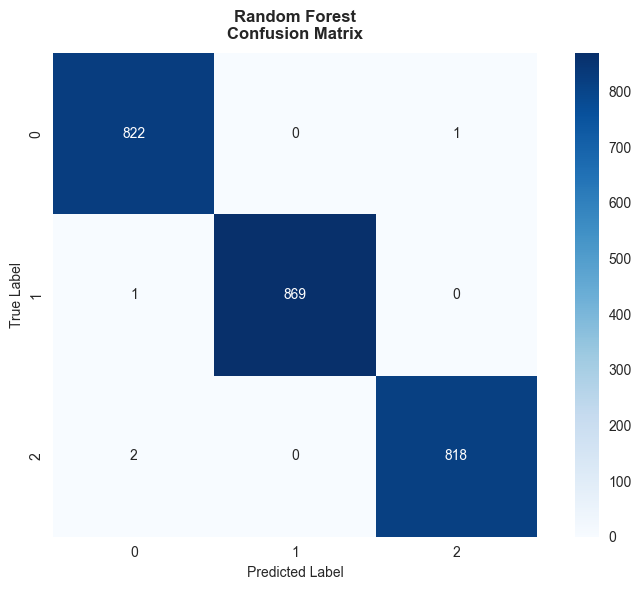

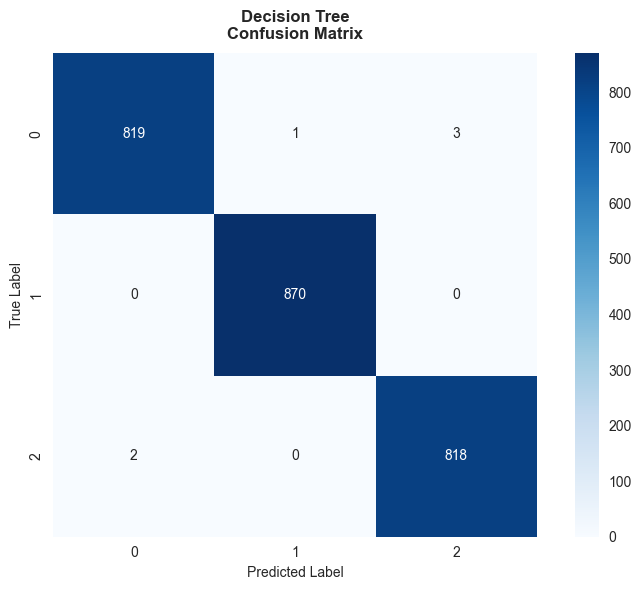

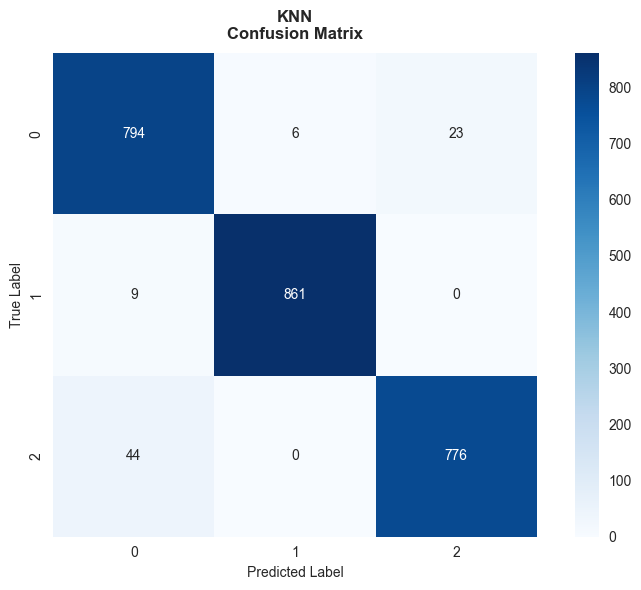

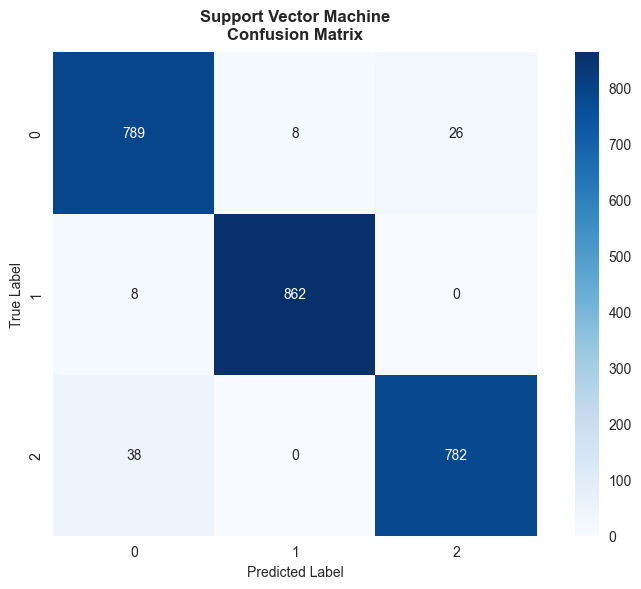

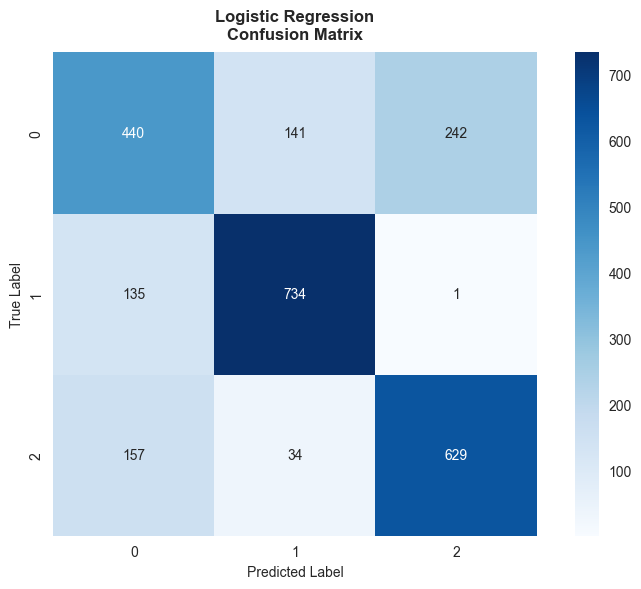

In [39]:
for model, name in models_list:
    # Create figure for the model
    plt.style.use('seaborn-v0_8')
    plt.figure(figsize=(8, 6))
    
    # Calculate confusion matrix
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    # Create heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                cbar=True, square=True)
    
    # Customize plot
    plt.title(f'{name}\nConfusion Matrix', pad=10, fontsize=12, fontweight='bold')
    plt.xlabel('Predicted Label', fontsize=10)
    plt.ylabel('True Label', fontsize=10)
    
    # Adjust layout and show
    plt.tight_layout()
    plt.show()

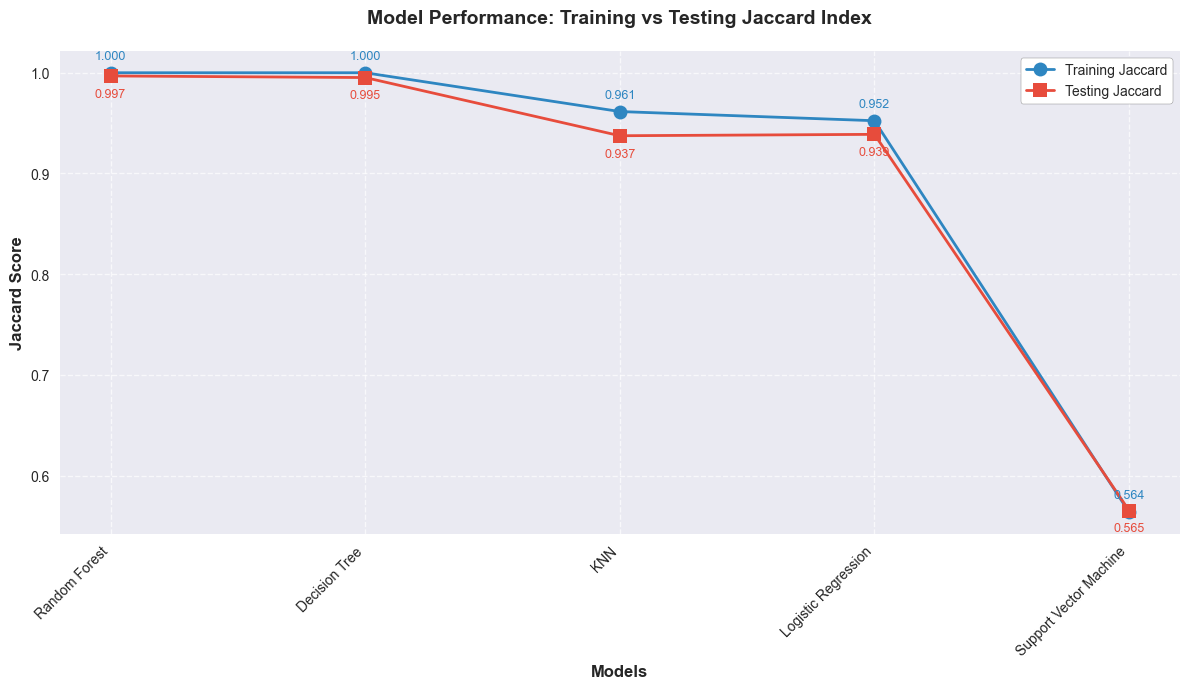

In [40]:
# Calculate Jaccard indices
models = ['Random Forest', 'Decision Tree', 'KNN', 'Logistic Regression', 'Support Vector Machine']
train_jaccard = [
    jaccard_score(y_train, pipe_rf.predict(X_train), average='weighted'),
    jaccard_score(y_train, pipe_dt.predict(X_train), average='weighted'),
    jaccard_score(y_train, pipe_knn.predict(X_train), average='weighted'),
    jaccard_score(y_train, pipe_svc.predict(X_train), average='weighted'),
    jaccard_score(y_train, pipe_lr.predict(X_train), average='weighted')
]
test_jaccard = [
    jaccard_score(y_test, pipe_rf.predict(X_test), average='weighted'),
    jaccard_score(y_test, pipe_dt.predict(X_test), average='weighted'),
    jaccard_score(y_test, pipe_knn.predict(X_test), average='weighted'),
    jaccard_score(y_test, pipe_svc.predict(X_test), average='weighted'),
    jaccard_score(y_test, pipe_lr.predict(X_test), average='weighted')
]

# Create enhanced line plot
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(12, 7))
plt.plot(models, train_jaccard, marker='o', label='Training Jaccard', color='#2E86C1', linewidth=2, markersize=10)
plt.plot(models, test_jaccard, marker='s', label='Testing Jaccard', color='#E74C3C', linewidth=2, markersize=10)
plt.xlabel('Models', fontsize=12, fontweight='bold')
plt.ylabel('Jaccard Score', fontsize=12, fontweight='bold')
plt.title('Model Performance: Training vs Testing Jaccard Index', fontsize=14, fontweight='bold', pad=20)
plt.legend(fontsize=10, frameon=True, facecolor='white', framealpha=1, edgecolor='gray')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Add value annotations
for i, (train_jac, test_jac) in enumerate(zip(train_jaccard, test_jaccard)):
    plt.annotate(f'{train_jac:.3f}', (models[i], train_jac), textcoords="offset points", 
                xytext=(0,10), ha='center', fontsize=9, color='#2E86C1')
    plt.annotate(f'{test_jac:.3f}', (models[i], test_jac), textcoords="offset points", 
                xytext=(0,-15), ha='center', fontsize=9, color='#E74C3C')

plt.tight_layout()
plt.show()


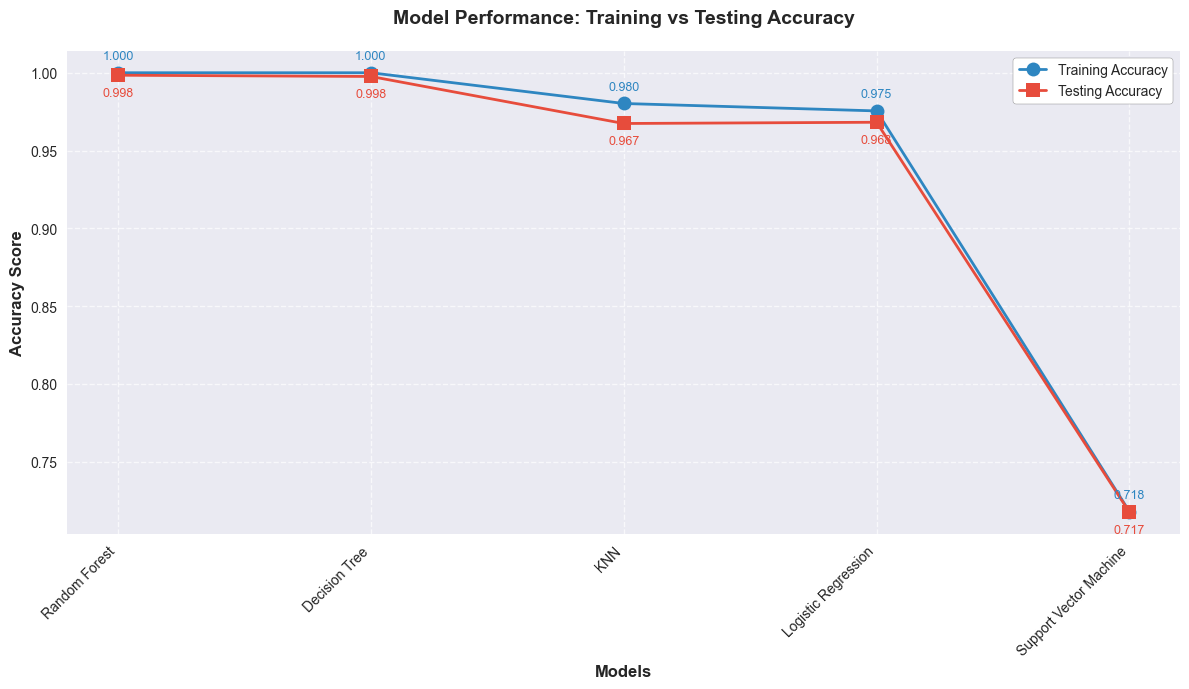

In [37]:
# Calculate accuracies
models = ['Random Forest', 'Decision Tree', 'KNN', 'Logistic Regression', 'Support Vector Machine']
train_accuracies = [
    accuracy_score(y_train, pipe_rf.predict(X_train)),
    accuracy_score(y_train, pipe_dt.predict(X_train)),
    accuracy_score(y_train, pipe_knn.predict(X_train)),
    accuracy_score(y_train, pipe_svc.predict(X_train)),
    accuracy_score(y_train, pipe_lr.predict(X_train))
]
test_accuracies = [
    accuracy_score(y_test, pipe_rf.predict(X_test)),
    accuracy_score(y_test, pipe_dt.predict(X_test)),
    accuracy_score(y_test, pipe_knn.predict(X_test)),
    accuracy_score(y_test, pipe_svc.predict(X_test)),
    accuracy_score(y_test, pipe_lr.predict(X_test))
]

# Create enhanced line plot
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(12, 7))
plt.plot(models, train_accuracies, marker='o', label='Training Accuracy', color='#2E86C1', linewidth=2, markersize=10)
plt.plot(models, test_accuracies, marker='s', label='Testing Accuracy', color='#E74C3C', linewidth=2, markersize=10)
plt.xlabel('Models', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy Score', fontsize=12, fontweight='bold')
plt.title('Model Performance: Training vs Testing Accuracy', fontsize=14, fontweight='bold', pad=20)
plt.legend(fontsize=10, frameon=True, facecolor='white', framealpha=1, edgecolor='gray')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Add value annotations
for i, (train_acc, test_acc) in enumerate(zip(train_accuracies, test_accuracies)):
    plt.annotate(f'{train_acc:.3f}', (models[i], train_acc), textcoords="offset points", 
                xytext=(0,10), ha='center', fontsize=9, color='#2E86C1')
    plt.annotate(f'{test_acc:.3f}', (models[i], test_acc), textcoords="offset points", 
                xytext=(0,-15), ha='center', fontsize=9, color='#E74C3C')

plt.tight_layout()
plt.show()


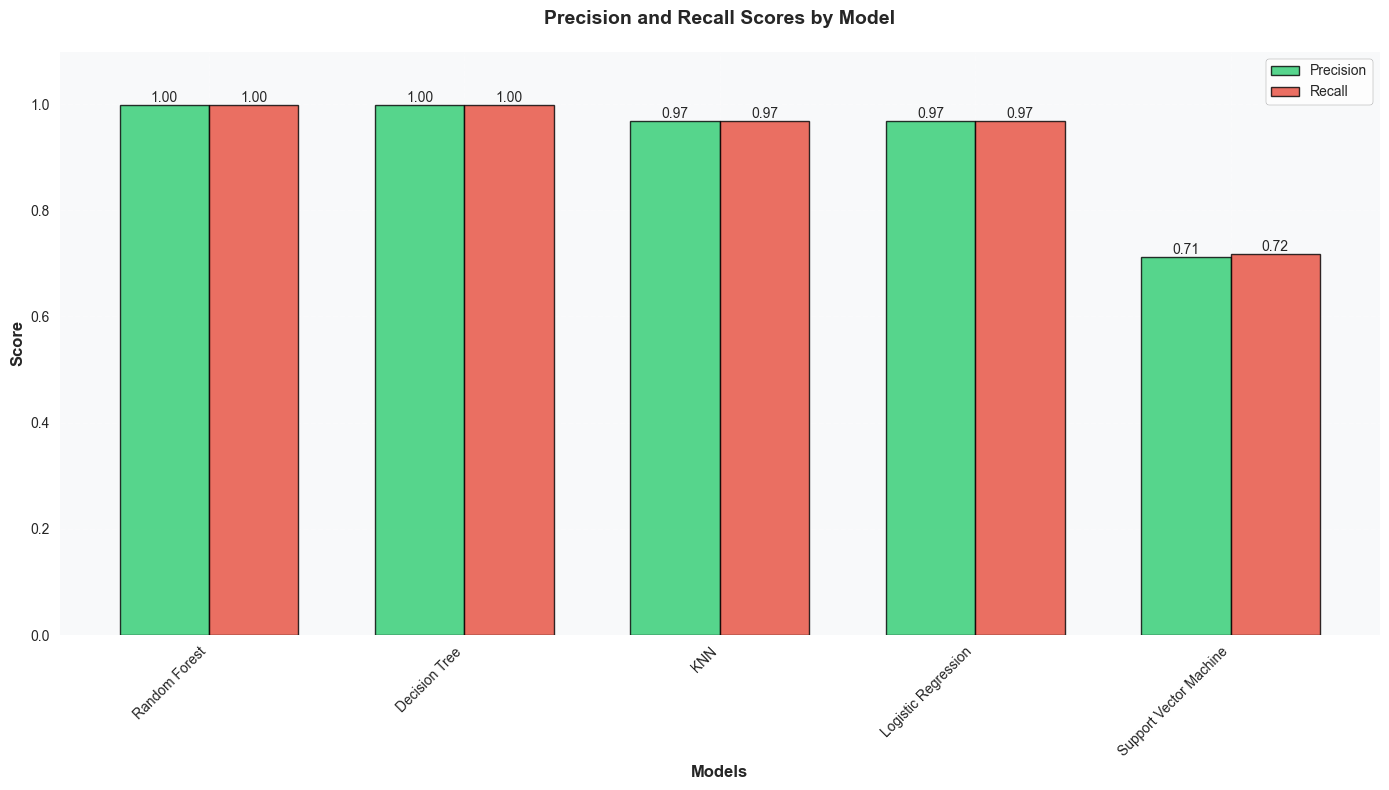

In [35]:
from sklearn.metrics import precision_score, recall_score

# Calculate precision and recall
models = ['Random Forest', 'Decision Tree', 'KNN', 'Logistic Regression', 'Support Vector Machine']
precision_scores = [
    precision_score(y_test, pipe_rf.predict(X_test), average='weighted'),
    precision_score(y_test, pipe_dt.predict(X_test), average='weighted'),
    precision_score(y_test, pipe_knn.predict(X_test), average='weighted'),
    precision_score(y_test, pipe_svc.predict(X_test), average='weighted'),
    precision_score(y_test, pipe_lr.predict(X_test), average='weighted')
]
recall_scores = [
    recall_score(y_test, pipe_rf.predict(X_test), average='weighted'),
    recall_score(y_test, pipe_dt.predict(X_test), average='weighted'),
    recall_score(y_test, pipe_knn.predict(X_test), average='weighted'),
    recall_score(y_test, pipe_svc.predict(X_test), average='weighted'),
    recall_score(y_test, pipe_lr.predict(X_test), average='weighted')
]

# Create bar plot with enhanced styling
plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots(figsize=(14, 8))
x = np.arange(len(models))
width = 0.35

bars1 = ax.bar(x - width/2, precision_scores, width, label='Precision', 
               color='#2ecc71', alpha=0.8, edgecolor='black', linewidth=1)
bars2 = ax.bar(x + width/2, recall_scores, width, label='Recall', 
               color='#e74c3c', alpha=0.8, edgecolor='black', linewidth=1)

# Add value labels on top of bars
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}',
                ha='center', va='bottom', fontsize=10)

autolabel(bars1)
autolabel(bars2)

# Customize the plot
ax.set_xlabel('Models', fontsize=12, fontweight='bold')
ax.set_ylabel('Score', fontsize=12, fontweight='bold')
ax.set_title('Precision and Recall Scores by Model', fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right', fontsize=10)
ax.legend(fontsize=10, frameon=True, facecolor='white', edgecolor='gray')
ax.grid(True, alpha=0.3, linestyle='--')

# Set y-axis limits with some padding
ax.set_ylim(0, max(max(precision_scores), max(recall_scores)) + 0.1)

# Add a light background color
ax.set_facecolor('#f8f9fa')
fig.patch.set_facecolor('white')

plt.tight_layout()
plt.show()

C:\Users\PMLS\AppData\Local\Temp\ipykernel_5836\3502714024.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(models, rotation=45, ha='right', fontsize=10)


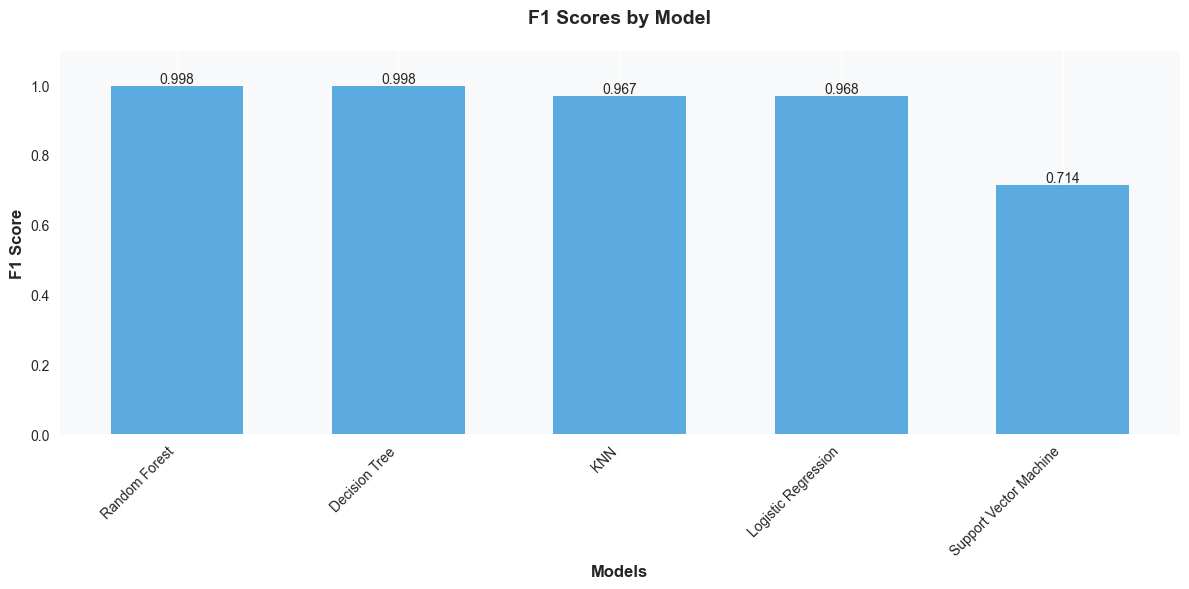

In [44]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall and f1 scores
models = ['Random Forest', 'Decision Tree', 'KNN', 'Logistic Regression', 'Support Vector Machine']
f1_scores = [
    f1_score(y_test, pipe_rf.predict(X_test), average='weighted'),
    f1_score(y_test, pipe_dt.predict(X_test), average='weighted'),
    f1_score(y_test, pipe_knn.predict(X_test), average='weighted'),
    f1_score(y_test, pipe_svc.predict(X_test), average='weighted'),
    f1_score(y_test, pipe_lr.predict(X_test), average='weighted')
]

# Create bar plot with enhanced styling
plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots(figsize=(12, 6))

# Create bars
bars = ax.bar(models, f1_scores, color='#3498db', alpha=0.8, width=0.6)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.3f}',
            ha='center', va='bottom', fontsize=10)

# Customize the plot
ax.set_xlabel('Models', fontsize=12, fontweight='bold')
ax.set_ylabel('F1 Score', fontsize=12, fontweight='bold')
ax.set_title('F1 Scores by Model', fontsize=14, fontweight='bold', pad=20)
ax.set_xticklabels(models, rotation=45, ha='right', fontsize=10)
ax.grid(True, alpha=0.3, linestyle='--', axis='y')

# Set y-axis limits with padding
ax.set_ylim(0, max(f1_scores) * 1.1)

# Add a light background color
ax.set_facecolor('#f8f9fa')
fig.patch.set_facecolor('white')

plt.tight_layout()
plt.show()
